In [1]:
from xymap import XYMap
import numpy as np
import matplotlib.pyplot as plt
import sys

## Matrix import

In [2]:
mat = np.loadtxt('eco_matrix.dat')
# Removing the rows and the columns of only zeros
mat = mat[mat.sum(axis=1)>0]
mat = mat[:,mat.sum(axis=0)>0]

## Running the algorithm

### Definition and parameter setting

In [3]:
# Algorithm initialization and default parameter setting
alg = XYMap(mat)

# Current parameters. See documentation for more info
print(alg.params)

{'delta_conv': 1e-08, 't_max': 1000, 'low_bound': 1e-30, 'print_info': True}


In [4]:
# Parameters can be changed by specifying them in the algorithm contructor..
alg = XYMap(mat, delta_conv=10**(-5))

# ..or modifying directly the dictionary
alg.params['t_max'] = 500

print(alg.params)

{'delta_conv': 1e-05, 't_max': 500, 'low_bound': 1e-30, 'print_info': True}


### Execution

In [5]:
# Exponent of the map
gamma = -1 # This case recover the fitness-complexity map

# Layer of the score computation: 0 for the x score of the nodes associated to the matrix rows,
# 1 for the y score of the columns.
axis = 0

alg.run(axis, gamma)

Convergence in 45 time steps.


## Getting the result

### Plotting the trajectories

Text(0.5,1,'Score trajectories')

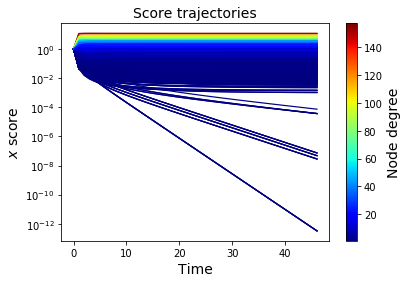

In [6]:
# The function of the algorithm class plots the trajectories colored accodring to the node degree
fig, ax = alg.plot_traj(axis)
# Additional features of the plot can be added acting on the returned ax
ax.set_title('Score trajectories', fontsize=14)

### Printing the ranking and the final scores

In [7]:
# Ranking of the matrix idexes
print(alg.x_ranking)
print()

# Final scores
print(alg.x_scores)
print()

# The trajectories are stored in a matrix where each column is the score of a given node 
# (indexes that correspond to the original matrix indexes) and each row is the set of scores
# at a given time.
print(alg.x_traj[-1]) # The last row is the list of the final scores and correspond to alg.x_scores
print()
print(alg.x_traj[ :, alg.x_ranking[0] ]) # Trajectory of the largest x_score
print()

[ 66 712 298 ... 856 674 932]

[6.91938023e-01 3.99343039e-03 4.96374265e-03 ... 5.37704472e+00
 3.39916951e+00 2.12925289e+00]

[6.91938023e-01 3.99343039e-03 4.96374265e-03 ... 5.37704472e+00
 3.39916951e+00 2.12925289e+00]

[ 1.         11.33232169 11.71193973 11.72790955 11.69478269 11.65987479
 11.6325212  11.61292178 11.59933835 11.59002753 11.58364925 11.5792585
 11.57621114 11.57407393 11.57255654 11.5714642  11.57066582 11.57007267
 11.56962435 11.56927945 11.56900934 11.56879405 11.56861953 11.56847579
 11.56835564 11.56825385 11.56816657 11.56809092 11.56802473 11.56796633
 11.56791444 11.56786803 11.56782631 11.56778861 11.56775442 11.56772329
 11.56769486 11.56766883 11.56764493 11.56762295 11.56760271 11.56758402
 11.56756676 11.56755079 11.567536   11.5675223  11.5675096 ]



## The opposite layer

Note that the variables x_score, x_ranking and x_traj have been generated since the algorithm focuses on the x_score (axis = 0).
The associated variables for the y scores can have errors when there are zero fixed points.

However the y-scores associated to the obtained x-score generated by the map are anyway stored in variables that start with the "inverse" prefix, as shwon below.

In [8]:
# Ranking of the matrix idexes
print(alg.inverse_y_ranking[:10])
print()

# The trajectories are stored in a matrix where each column is the score of a given node 
# (indexes that correspond to the original matrix indexes) and each row is the set of scores
# at a given time.
print(alg.inverse_y_traj[-1][:10]) # The last row is the list of the final scores
print()
print(alg.inverse_y_traj[ :, alg.inverse_y_ranking[0] ]) # Trajectory of the largest score
print()

[ 69 207  62  47   5   4  53 449 157  97]

[7.23220927e-09 4.00391057e-09 1.33133112e-08 1.31807051e-08
 4.06493643e-06 4.15859551e-06 2.37269658e-09 4.61407312e-09
 1.26743539e-08 4.15261169e-09]

[  1.           0.83697148   1.90219937   3.49730649   6.04431425
  10.14971172  16.73267649  27.12351837  43.08405212  66.60291771
  99.27706809 141.26335668 190.31112338 241.85558017 290.59658703
 332.53959839 366.00830537 391.30138979 409.75620815 422.9573559
 432.31769801 438.94467231 443.65010904 447.00881733 449.42128311
 451.16517465 452.43336042 453.36056925 454.04163576 454.54386976
 454.91543801 455.19107179 455.3959851  455.5485905  455.66240086
 455.74737446 455.81087508 455.85836317 455.89389688 455.92049774
 455.94041865 455.95534142 455.9665227  455.97490212 455.98118273
 455.98589079 455.98942037]



Running the algorithm also for the second layer creates all the standard variables shown before for the x-score.

In [9]:
alg.run(1, gamma)
print(alg.y_ranking[:10])

Convergence in 46 time steps.
[ 69 207  62  47   5   4  53 449 157  97]


Note that the considered case gamma=1, the ranking coincide with inverse_y_ranking. However, this is true only because the x trajectories do not hit the low threshold.
If you try gamma=-1.5, for example, the two rankings are no longer equal

## Extinction area

In [10]:
# The extinction area can be get through the following method. 
# It refers to the last computed ranking of the given axis.
print(alg.ext_area(0))

0.29122554950594876


In [19]:
# Scanning the extinction area
gammas = np.linspace(-2,0,100)
areas = np.array([])
alg.params['print_info'] = False

for g in gammas:
    alg.run(0, g)
    areas = np.append(areas, alg.ext_area(0))
    sys.stdout.write('\rLast evaluated gamma: {}'.format(g))
    sys.stdout.flush()

Last evaluated gamma: 0.002020202020202011

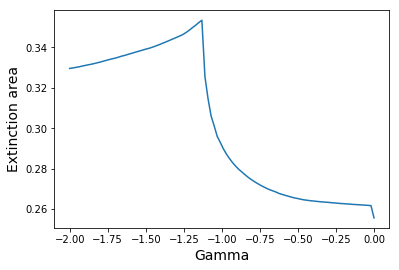

In [20]:
plt.xlabel('Gamma', fontsize=14)
plt.ylabel('Extinction area', fontsize=14)
plt.plot(gammas, areas)